<a href="https://colab.research.google.com/github/satyhim/Projects/blob/main/Seeds_Data_Classi_Algorithm4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Seeds Data Project : Classification Algorithm 

In [56]:
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [57]:
Seeds_Data= pd.read_excel('/content/drive/MyDrive/Python/Project/seeds_dataset.xlsx')

In [58]:
Seeds_Data.head()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry coefficient,Length of kernel groove,Class (1_2_3
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1


In [59]:
Seeds_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210 entries, 0 to 209
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Area                     210 non-null    float64
 1   Perimeter                210 non-null    float64
 2   Compactness              210 non-null    float64
 3   Length of Kernel         210 non-null    float64
 4   Width of Kernel          210 non-null    float64
 5   Asymmetry coefficient    210 non-null    float64
 6   Length of kernel groove  210 non-null    float64
 7   Class (1_2_3             210 non-null    int64  
dtypes: float64(7), int64(1)
memory usage: 13.2 KB


In [60]:
Seeds_Data.describe()

,Area,Perimeter,Compactness,Length of Kernel,Width of Kernel,Asymmetry coefficient,Length of kernel groove,Class (1_2_3
count,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000,210.000000
mean,14.847524,14.559286,0.870999,5.628533,3.258605,3.700201,5.408071,2.000000
std,2.909699,1.305959,0.023629,0.443063,0.377714,1.503557,0.491480,0.818448
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.270000,13.450000,0.856900,5.262250,2.944000,2.561500,5.045000,1.000000
50%,14.355000,14.320000,0.873450,5.523500,3.237000,3.599000,5.223000,2.000000
75%,17.305000,15.715000,0.887775,5.979750,3.561750,4.768750,5.877000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.456000,6.550000,3.000000


In [61]:
Seeds_Data.isna().sum()

Area                       0
Perimeter                  0
Compactness                0
Length of Kernel           0
Width of Kernel            0
Asymmetry coefficient      0
Length of kernel groove    0
Class (1_2_3               0
dtype: int64

In [ ]:
plt.figure(figsize = (10,5))
sns.heatmap(df.corr(), annot = True, cmap="rainbow")
plt.show()

In [62]:
X = Seeds_Data.drop(['Class (1_2_3'], axis=1)

y = Seeds_Data['Class (1_2_3']

In [84]:
# Importing the required packages
import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report


# Function to split the dataset
def splitdataset(Seeds_Data):

	# Separating the target variable
	X = Seeds_Data.drop(['Class (1_2_3'], axis=1)
	Y = Seeds_Data['Class (1_2_3']

	# Splitting the dataset into train and test
	X_train, X_test, y_train, y_test = train_test_split(
	X, Y, test_size = 0.3, random_state = 100)
	
	return X, Y, X_train, X_test, y_train, y_test
	
# Function to perform training with giniIndex.
def train_using_gini(X_train, X_test, y_train):

	# Creating the classifier object
	clf_gini = DecisionTreeClassifier(criterion = "gini",
			random_state = 100,max_depth=3, min_samples_leaf=5)

	# Performing training
	clf_gini.fit(X_train, y_train)
	return clf_gini
	
# Function to perform training with entropy.
def tarin_using_entropy(X_train, X_test, y_train):

	# Decision tree with entropy
	clf_entropy = DecisionTreeClassifier(
			criterion = "entropy", random_state = 100,
			max_depth = 3, min_samples_leaf = 5)

	# Performing training
	clf_entropy.fit(X_train, y_train)
	return clf_entropy


# Function to make predictions
def prediction(X_test, clf_object):

	# Predicton on test with giniIndex
	y_pred = clf_object.predict(X_test)
	print("Predicted values:")
	print(y_pred)
	return y_pred
	
# Function to calculate accuracy
def cal_accuracy(y_test, y_pred):
	
	print("Confusion Matrix: ",
		confusion_matrix(y_test, y_pred))
	
	print ("Accuracy : ",
	accuracy_score(y_test,y_pred)*100)
	
	print("Report : ",
	classification_report(y_test, y_pred))

# Driver code
def main():
	
	# Building Phase
	data = Seeds_Data
	X, Y, X_train, X_test, y_train, y_test = splitdataset(data)
	clf_gini = train_using_gini(X_train, X_test, y_train)
	clf_entropy = tarin_using_entropy(X_train, X_test, y_train)
	
	# Operational Phase
	print("Results Using Gini Index:")
	
	# Prediction using gini
	y_pred_gini = prediction(X_test, clf_gini)
	cal_accuracy(y_test, y_pred_gini)
	
	print("Results Using Entropy:")
	# Prediction using entropy
	y_pred_entropy = prediction(X_test, clf_entropy)
	cal_accuracy(y_test, y_pred_entropy)
	
	
# Calling main function
if __name__=="__main__":
	main()

Results Using Gini Index:
Predicted values:
[1 3 1 3 2 1 3 2 3 3 2 2 2 1 2 1 1 2 1 3 2 2 2 2 3 1 2 1 1 1 3 1 3 3 2 3 3
 3 3 2 2 1 2 2 1 3 3 1 3 2 1 3 3 3 1 3 3 1 1 2 1 2 2]
Confusion Matrix:  [[15  0  1]
 [ 0 21  0]
 [ 5  0 21]]
Accuracy :  90.47619047619048
Report :                precision    recall  f1-score   support

           1       0.75      0.94      0.83        16
           2       1.00      1.00      1.00        21
           3       0.95      0.81      0.88        26

    accuracy                           0.90        63
   macro avg       0.90      0.92      0.90        63
weighted avg       0.92      0.90      0.91        63

Results Using Entropy:
Predicted values:
[3 3 3 3 2 3 3 2 3 3 2 2 2 3 2 1 3 2 3 3 2 2 2 2 3 3 2 3 1 1 3 1 3 3 2 3 3
 3 3 2 2 1 2 2 1 3 3 3 3 2 1 3 3 3 1 3 3 1 3 2 3 2 2]
Confusion Matrix:  [[ 9  0  7]
 [ 0 21  0]
 [ 0  0 26]]
Accuracy :  88.88888888888889
Report :                precision    recall  f1-score   support

           1       1.00      

In [93]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()
clf.fit(X, y)


DecisionTreeClassifier()

[Text(0.6793478260869565, 0.9285714285714286, 'X[6] <= 5.576\ngini = 0.667\nsamples = 210\nvalue = [70, 70, 70]'),
 Text(0.44565217391304346, 0.7857142857142857, 'X[0] <= 13.41\ngini = 0.514\nsamples = 141\nvalue = [69, 2, 70]'),
 Text(0.2391304347826087, 0.6428571428571429, 'X[6] <= 4.789\ngini = 0.278\nsamples = 84\nvalue = [14, 0, 70]'),
 Text(0.13043478260869565, 0.5, 'X[3] <= 4.996\ngini = 0.219\nsamples = 8\nvalue = [7, 0, 1]'),
 Text(0.08695652173913043, 0.35714285714285715, 'X[5] <= 2.285\ngini = 0.5\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.043478260869565216, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.13043478260869565, 0.21428571428571427, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.17391304347826086, 0.35714285714285715, 'gini = 0.0\nsamples = 6\nvalue = [6, 0, 0]'),
 Text(0.34782608695652173, 0.5, 'X[0] <= 12.71\ngini = 0.167\nsamples = 76\nvalue = [7, 0, 69]'),
 Text(0.2608695652173913, 0.35714285714285715, 'X[5] <= 1.538\ngini

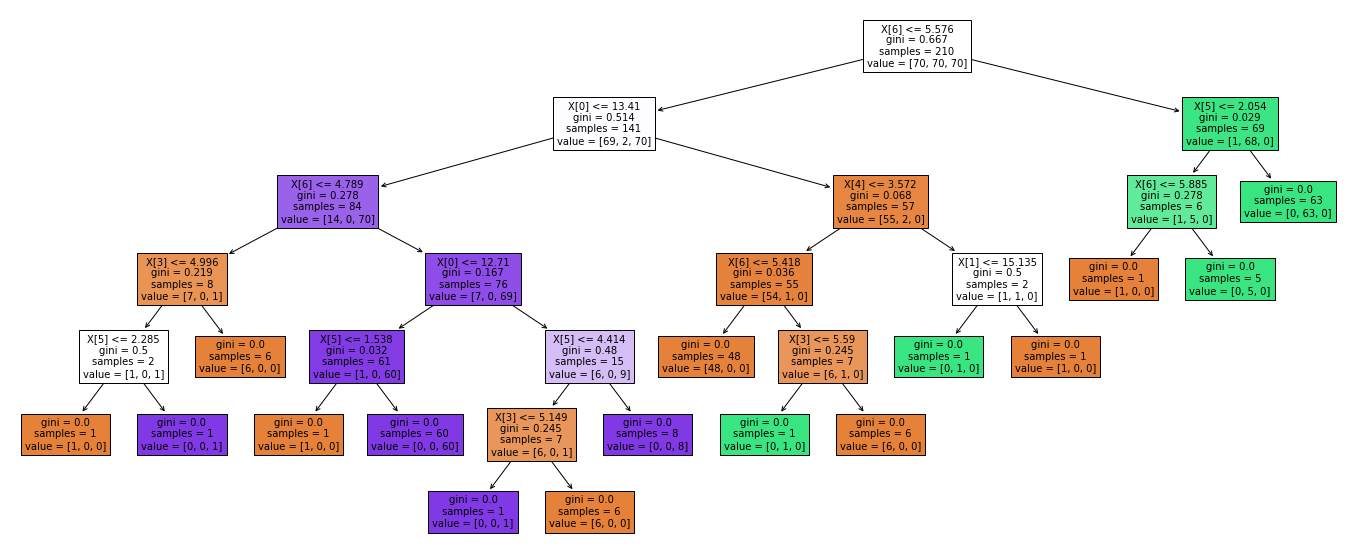

In [90]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(24,10))
tree.plot_tree(clf, filled=True, fontsize=10)

[Text(0.6, 0.8333333333333334, 'X[6] <= 5.576\ngini = 0.667\nsamples = 210\nvalue = [70, 70, 70]'),
 Text(0.4, 0.5, 'X[0] <= 13.41\ngini = 0.514\nsamples = 141\nvalue = [69, 2, 70]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.278\nsamples = 84\nvalue = [14, 0, 70]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.068\nsamples = 57\nvalue = [55, 2, 0]'),
 Text(0.8, 0.5, 'gini = 0.029\nsamples = 69\nvalue = [1, 68, 0]')]

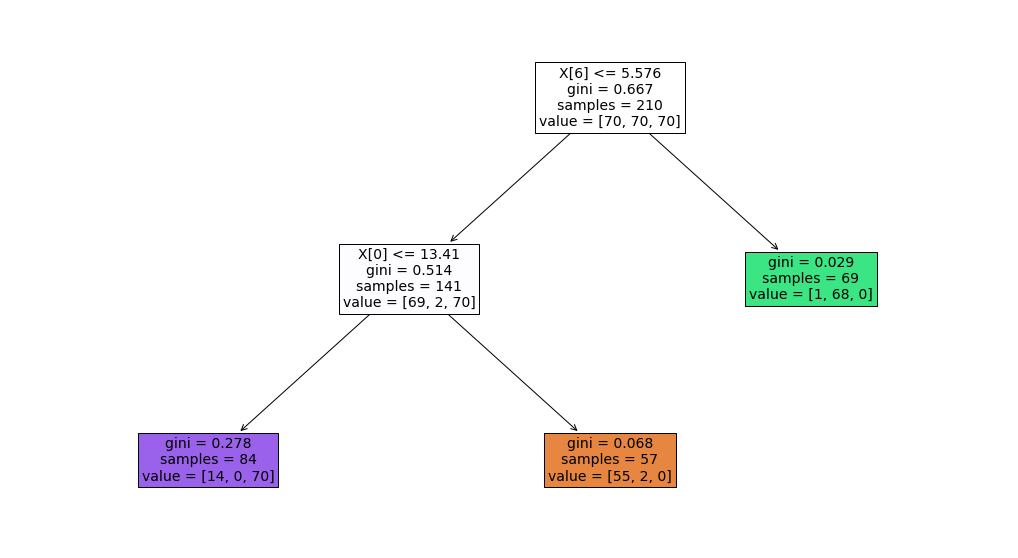

In [94]:
clf = tree.DecisionTreeClassifier(min_impurity_decrease=0.2)
clf.fit(X, y)
plt.figure(figsize=(18,10))
tree.plot_tree(clf, filled=True, fontsize=14)

[Text(0.5769230769230769, 0.875, 'X[6] <= 5.576\ngini = 0.667\nsamples = 210\nvalue = [70, 70, 70]'),
 Text(0.3076923076923077, 0.625, 'X[0] <= 13.41\ngini = 0.514\nsamples = 141\nvalue = [69, 2, 70]'),
 Text(0.15384615384615385, 0.375, 'X[6] <= 4.789\ngini = 0.278\nsamples = 84\nvalue = [14, 0, 70]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [7, 0, 1]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.167\nsamples = 76\nvalue = [7, 0, 69]'),
 Text(0.46153846153846156, 0.375, 'X[4] <= 3.572\ngini = 0.068\nsamples = 57\nvalue = [55, 2, 0]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.036\nsamples = 55\nvalue = [54, 1, 0]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.8461538461538461, 0.625, 'X[5] <= 2.054\ngini = 0.029\nsamples = 69\nvalue = [1, 68, 0]'),
 Text(0.7692307692307693, 0.375, 'X[6] <= 5.885\ngini = 0.278\nsamples = 6\nvalue = [1, 5, 0]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.0\nsamples = 1\nvalue = 

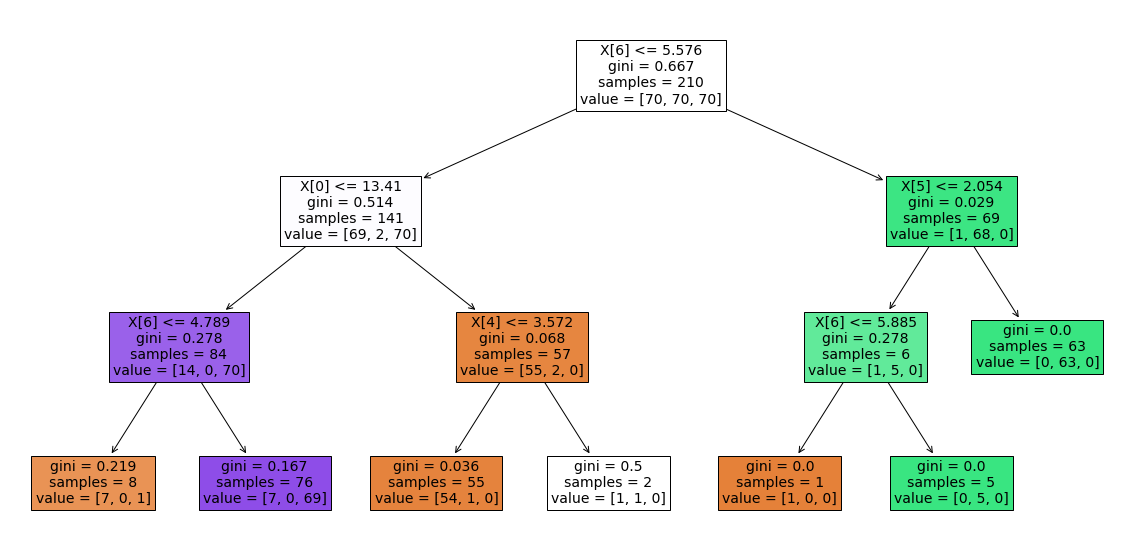

In [95]:
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)

[Text(0.5769230769230769, 0.875, 'X[6] <= 5.576\ngini = 0.667\nsamples = 210\nvalue = [70, 70, 70]'),
 Text(0.3076923076923077, 0.625, 'X[0] <= 13.41\ngini = 0.514\nsamples = 141\nvalue = [69, 2, 70]'),
 Text(0.15384615384615385, 0.375, 'X[6] <= 4.789\ngini = 0.278\nsamples = 84\nvalue = [14, 0, 70]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.219\nsamples = 8\nvalue = [7, 0, 1]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.167\nsamples = 76\nvalue = [7, 0, 69]'),
 Text(0.46153846153846156, 0.375, 'X[4] <= 3.464\ngini = 0.068\nsamples = 57\nvalue = [55, 2, 0]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.0\nsamples = 48\nvalue = [48, 0, 0]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.346\nsamples = 9\nvalue = [7, 2, 0]'),
 Text(0.8461538461538461, 0.625, 'X[5] <= 2.054\ngini = 0.029\nsamples = 69\nvalue = [1, 68, 0]'),
 Text(0.7692307692307693, 0.375, 'X[0] <= 19.225\ngini = 0.278\nsamples = 6\nvalue = [1, 5, 0]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.444\nsamples = 3\nvalue

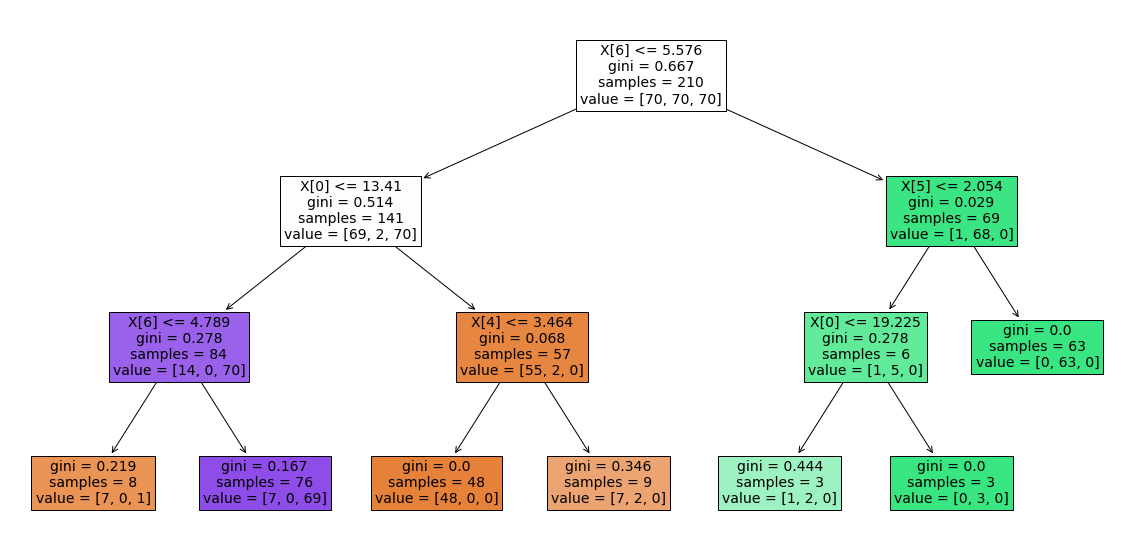

In [96]:
clf = tree.DecisionTreeClassifier(max_depth=3,min_samples_leaf=3)
clf.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)

[Text(0.6666666666666666, 0.9, 'X[6] <= 5.576\ngini = 0.667\nsamples = 210\nvalue = [70, 70, 70]'),
 Text(0.5, 0.7, 'X[0] <= 13.41\ngini = 0.514\nsamples = 141\nvalue = [69, 2, 70]'),
 Text(0.3333333333333333, 0.5, 'X[6] <= 4.789\ngini = 0.278\nsamples = 84\nvalue = [14, 0, 70]'),
 Text(0.16666666666666666, 0.3, 'gini = 0.219\nsamples = 8\nvalue = [7, 0, 1]'),
 Text(0.5, 0.3, 'X[0] <= 12.71\ngini = 0.167\nsamples = 76\nvalue = [7, 0, 69]'),
 Text(0.3333333333333333, 0.1, 'gini = 0.032\nsamples = 61\nvalue = [1, 0, 60]'),
 Text(0.6666666666666666, 0.1, 'gini = 0.48\nsamples = 15\nvalue = [6, 0, 9]'),
 Text(0.6666666666666666, 0.5, 'gini = 0.068\nsamples = 57\nvalue = [55, 2, 0]'),
 Text(0.8333333333333334, 0.7, 'gini = 0.029\nsamples = 69\nvalue = [1, 68, 0]')]

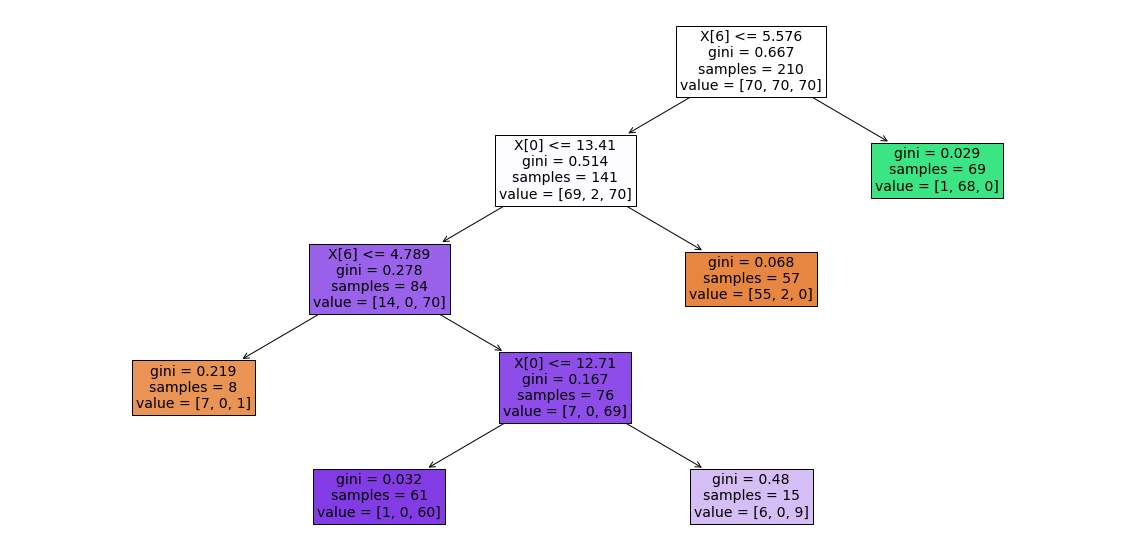

In [97]:
clf = tree.DecisionTreeClassifier(max_leaf_nodes=5)
clf.fit(X, y)
plt.figure(figsize=(20,10))
tree.plot_tree(clf, filled=True, fontsize=14)